# Supervised Learning Project: Binary Prediction of Smoker Status

## 1. Problem Definition and Dataset Choice

**Dataset Choice:** H) Binary Prediction of Smoker Status using Bio-Signals. (Source: `train.csv` from https://www.kaggle.com/competitions/playground-series-s3e24/data?select=train.csv)

----------------------------------------------

### **Problem Definition**
The goal of this project is to solve a supervised learning problem, focused essentially in binary classification. We aim to develop a predictive model capable of accurately assigning an individual to one of two distinct categories: Smoker or Non-Smoker.

- **Target Variable**: The target variable in this study is a Smoker Status, a categorical variable with two possible classes:
Positive Class: Smoker;
Negative Class: Non-Smoker

- **Input Data**: Our model’s input data is a bio-signals dataset. These are physiological measures that are indicators of different activities in the body. The bio-signals that are incorporated for this project are age, height, weight, eyesight, hearing and systolic blood pressure . Our dataset will consist of a set of bio-signal features for each individual.

Our interest will be on testing strong machine learning models that would learn all the complex associations between these bio-signals and the individual’s status as a smoker, in a purely data-driven way of prediction.

----------------------------------------------

### **Methodology Justification**

- **Tools and Libraries**: We will use Python and make use of the Pandas library for data manipulation, NumPy for numerical calculations and Scikit-learn for the implementation of various machine learning algorithms and evaluation metrics. The PyTorch framework will be used to implement the Neural Network. Matplotlib will be used for data visualization to explore the data and present model performance.

- **Algorithms**: In order to solve the binary classification problem of predicting smoker status, we have chosen to implement and compare the following supervised learning algorithms:

  -- **Decision Tree**: This tree based algorithm will be a possibly interpretable baseline model that is able to represent non-linear decision boundaries via a series of sequential rules.

  -- **k-Nearest Neighbors (k-NN)**: This non-parametric approach will assign a classification to an individual according to the smoker status of the closest neighbors in the bio-signal feature space, thus allowing to evaluate the significance of local patterns in the data.

  -- **Support Vector Machine (SVM)**: This algorithm tries to find the best boundary that separates smokers from non-smokers. It works well for high-dimensional data and can handle non-linear patterns using kernel functions.

  -- **Neural Network (NN)**: A feedforward neural network architecture will be investigated using PyTorch to learn complex, non-linear relationships in the bio-signal data. This will help us see what a more sophisticated model can do.



- **Metrics**: Our deployed models will be assessed using the following standard classification metrics:

- **Accuracy**: To assess the general correctness of the predictions.
Precision: To evaluate the model’s capability of not predicting non-smokers as smokers.
Recall (Sensitivity): Used to evaluate the model’s performance in identifying all smokers.
F1-score: In order to balance precision and recall.
Confusion Matrix: Used to display the distribution of true positives, true negatives, false positives, and false negatives.
Training and Testing Times: To assess the computational expense of training and predicting with each model.

----------------------------------------------

### **Related Work:**

James, G., Witten, D., Hastie, T., Tibshirani, R. (2013). An Introduction to Statistical Learning. Springer.
https://www.statlearning.com/  

Moosavian, A., Ahmadi, H., Tabatabaeefar, A., & Khazaee, M. (2013). Comparison of Two Classifiers; K-Nearest Neighbor and Artificial Neural Network, for Fault Diagnosis on a Main Engine Journal-Bearing. Shock and Vibration, 20(2), 263–272.
https://doi.org/10.3233/SAV-2012-00742

Quinlan, J. R. (1993). C4.5: Programs for Machine Learning. Morgan Kaufmann Publishers

Cohen, G., Sapiro, G., & Giryes, R. (2018). DNN or k-NN: That is the Generalize vs. Memorize Question. arXiv preprint arXiv:1805.06822. https://arxiv.org/abs/1805.06822

Scikit-learn Documentation: “Supervised Learning Models.”
https://scikit-learn.org/stable/supervised_learning.html

Matplotlib Documentation: Visualization Libraries.
https://matplotlib.org/stable/contents.html

Towards Data Science, “Exploratory Data Analysis in Python.”
https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce

Qananwah, Q., Quran, H., Dagamseh, A. et al. Investigating the correlation between smoking and blood pressure via photoplethysmography. BioMed Eng OnLine 24, 57 (2025). https://doi.org/10.1186/s12938-025-01373-w

Thwin, D. (2023). Binary Prediction of Smoker Status using Bio-Signals – Report. Medium.
https://medium.com/@daran.thw/iccs463-binary-prediction-of-smoker-status-using-bio-signals-report-e66878f08ac3
Okka, A. (2023). Binary Prediction of Smoker Status using Bio-Signals. GitHub Repository.
https://github.com/ahmedokka29/Binary-Prediction-of-Smoker-Status-using-Bio-Signals

## 2. Import of all the necessary libraries for the project.
Import all necessary libraries for the project.

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer, roc_auc_score, roc_curve

from scipy.stats import expon
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings('ignore')

## 3. Data Loading
Load the dataset to be used across the project.

In [2]:
!git clone https://github.com/bernas013/Project2-AI.git

try:
    train_df_original = pd.read_csv('Project2-AI/train.csv')
    train_df = train_df_original.copy()
    print("Training data loaded successfully!")
except FileNotFoundError:
    print("Error: train.csv not found. Make sure the file is in the correct directory.")
    train_df = None


fatal: destination path 'Project2-AI' already exists and is not an empty directory.
Training data loaded successfully!


## 4. Exploratory Data Analysis (EDA)

\n--- First few rows of the training data ---
   id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0   55         165          60       81.0             0.5   
1   1   70         165          65       89.0             0.6   
2   2   20         170          75       81.0             0.4   
3   3   35         180          95      105.0             1.5   
4   4   30         165          60       80.5             1.5   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  HDL  LDL  \
0              0.6              1               1       135  ...   40   75   
1              0.7              2               2       146  ...   57  126   
2              0.5              1               1       118  ...   45   93   
3              1.2              1               1       131  ...   38  102   
4              1.0              1               1       121  ...   44   93   

   hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
0        16.5 

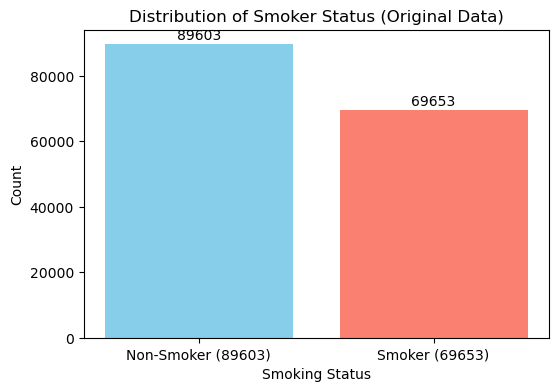

Imbalance Ratio (Non-Smoker/Smoker): 1.29:1


In [3]:
if train_df is not None:
    print("\\n--- First few rows of the training data ---")
    print(train_df.head())

    print("\\n--- Information about the dataset (Data Types, Non-Null Counts) ---")
    train_df.info()

    print("\\n--- Missing values in original train_df ---")
    missing_values = train_df_original.isnull().sum()
    print(missing_values[missing_values > 0])
    if missing_values.sum() == 0:
        print("No missing values found in the original dataset.")

    print("\\n--- Summary statistics of numerical features ---")
    print(train_df.describe()) #

    print("\\n--- Distribution of the target variable ('smoking') in Original Data ---")
    print(train_df['smoking'].value_counts()) #
    smoking_counts_original = train_df['smoking'].value_counts()
    plt.figure(figsize=(6, 4))
    bars = plt.bar(smoking_counts_original.index, smoking_counts_original.values, color=['skyblue', 'salmon'])
    plt.title('Distribution of Smoker Status (Original Data)')
    plt.xlabel('Smoking Status')
    plt.ylabel('Count')
    plt.xticks(smoking_counts_original.index, [f'Non-Smoker ({smoking_counts_original[0]})', f'Smoker ({smoking_counts_original[1]})'])
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 500, int(yval), va='bottom', ha='center', fontsize=10)
    plt.show()
    print(f"Imbalance Ratio (Non-Smoker/Smoker): {smoking_counts_original[0]/smoking_counts_original[1]:.2f}:1")


### Initial Exploration of a Few Bio-Signal Features (Histograms and Box Plots)
*(Visualizing distributions and relationships with the target variable.)*


--- Histograms of a few numerical features (Original Data) ---



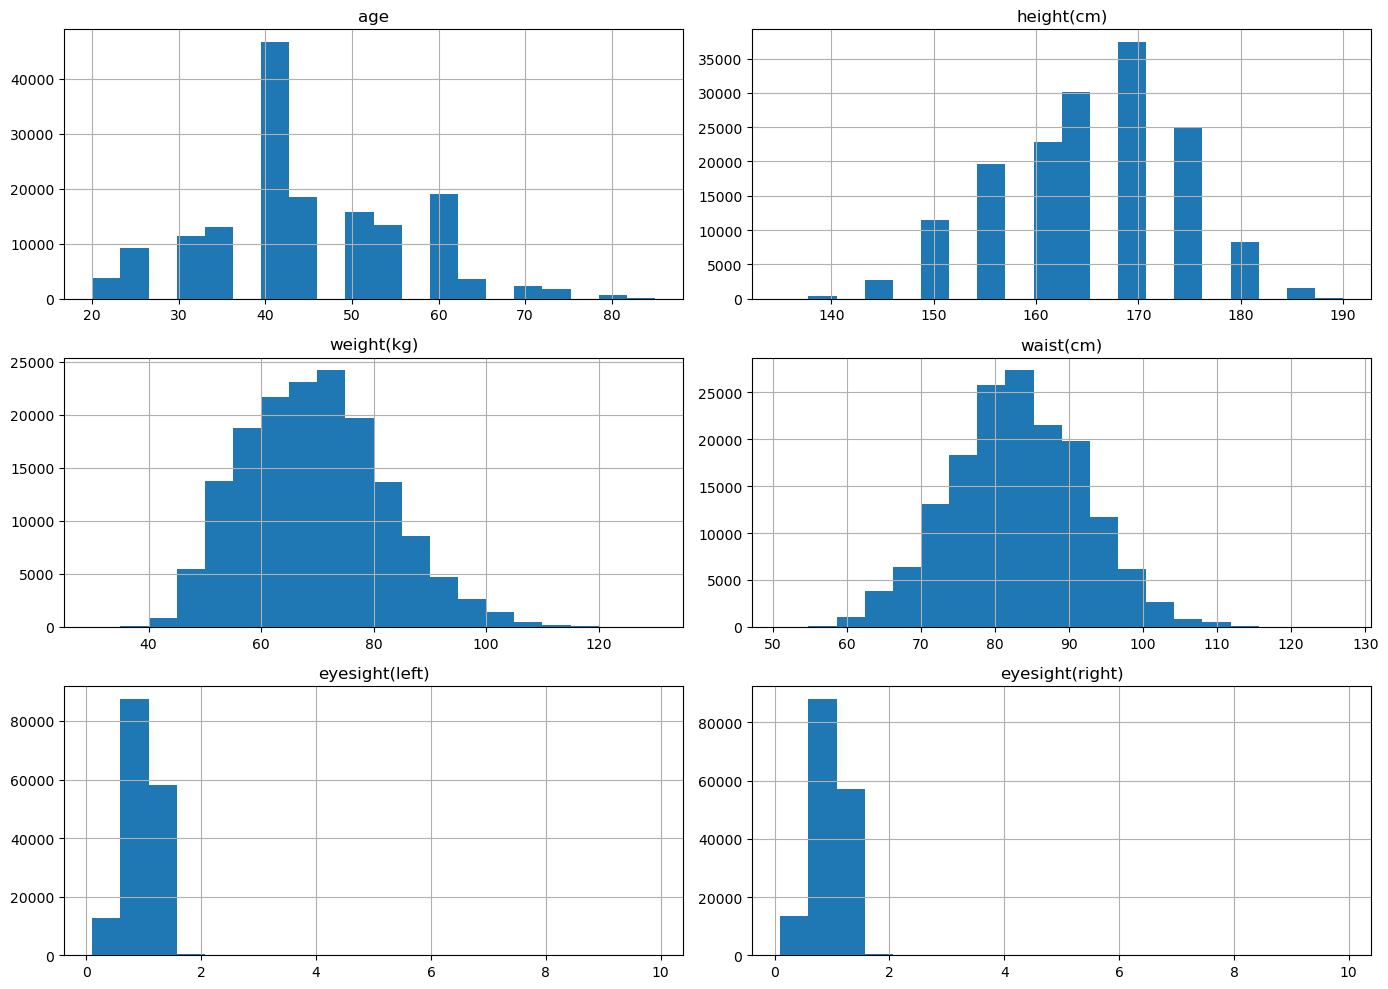


--- Box plots of a few numerical features vs. 'smoking' (Original Data) ---



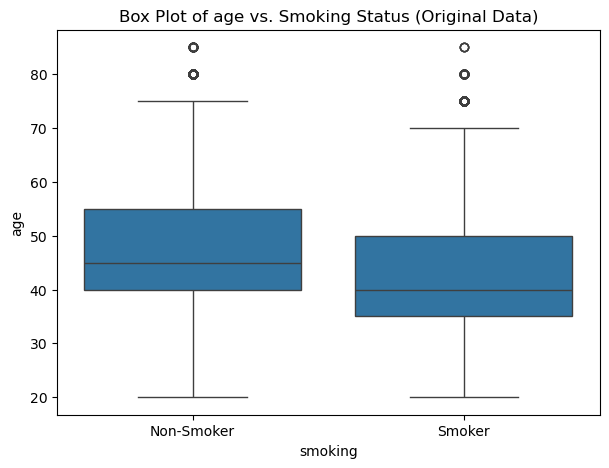

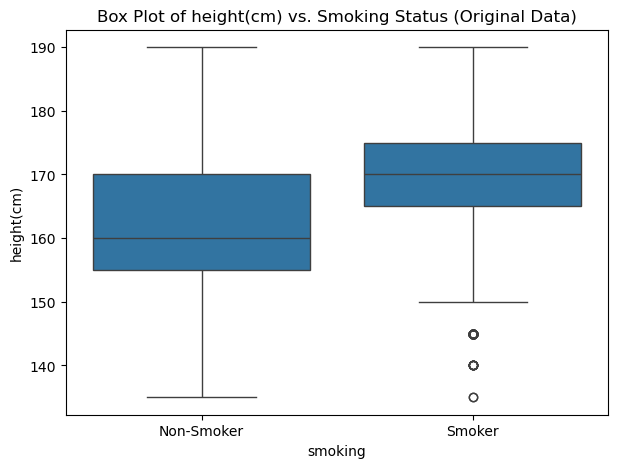

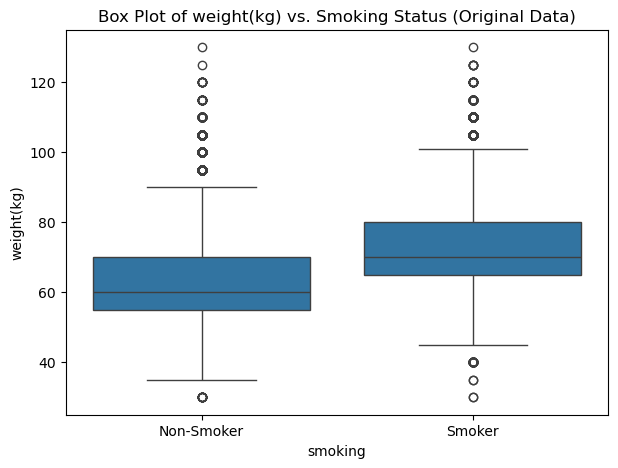

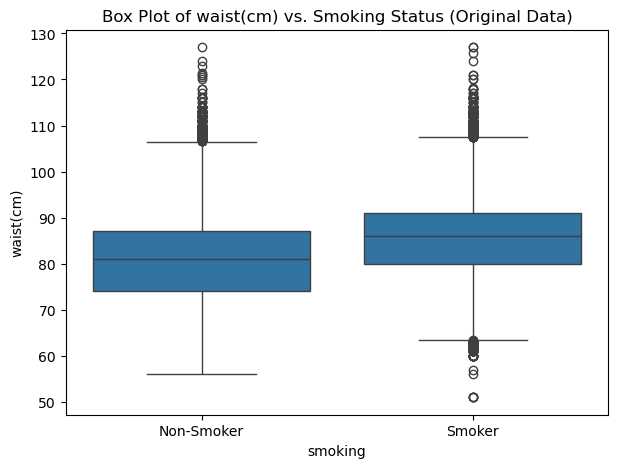

In [4]:
if train_df is not None:
    numerical_cols_eda = train_df.select_dtypes(include=np.number).columns.tolist()
    if 'id' in numerical_cols_eda:
        numerical_cols_eda.remove('id')
    if 'smoking' in numerical_cols_eda:
        numerical_cols_eda.remove('smoking')

    if numerical_cols_eda:
        print("\n--- Histograms of a few numerical features (Original Data) ---\n")
        num_to_plot_hist = min(6, len(numerical_cols_eda)) # Plot a few more
        train_df[numerical_cols_eda[:num_to_plot_hist]].hist(figsize=(14, 10), bins=20)
        plt.tight_layout()
        plt.show()

        print("\n--- Box plots of a few numerical features vs. 'smoking' (Original Data) ---\n")
        num_to_plot_box = min(4, len(numerical_cols_eda)) # Plot a few key ones
        for col in numerical_cols_eda[:num_to_plot_box]:
            plt.figure(figsize=(7, 5))
            sns.boxplot(x='smoking', y=col, data=train_df)
            plt.title(f'Box Plot of {col} vs. Smoking Status (Original Data)')
            plt.xticks([0,1],['Non-Smoker','Smoker'])
            plt.show()
            print("\n")


## 5. Data Preprocessing

### 5.1. Handling Class Imbalance (Random Undersampling)
The original dataset shows an imbalance. We'll use random undersampling of the majority class (non-smokers) to match the number of smokers. This helps prevent models from being biased towards the majority class.


--- Class distribution in the balanced DataFrame: --- 

smoking
1    69653
0    69653
Name: count, dtype: int64




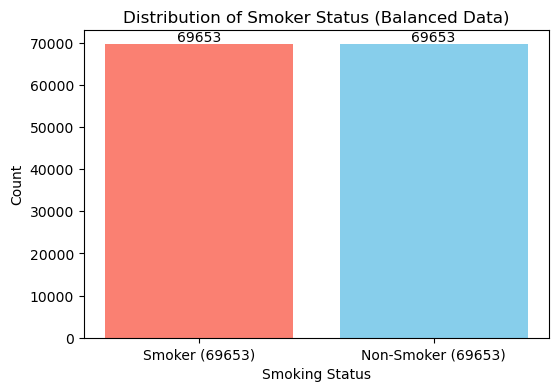

In [5]:
if train_df is not None:

    # Count the number of samples in each class
    smoker_count = train_df['smoking'].value_counts()[1]
    non_smoker_count = train_df['smoking'].value_counts()[0]

    # Identify the indices of each class
    smoker_indices = train_df[train_df['smoking'] == 1].index
    non_smoker_indices = train_df[train_df['smoking'] == 0].index

    # Randomly select non-smoker indices to match smoker count
    random_non_smoker_indices = np.random.choice(non_smoker_indices, smoker_count, replace=False)

    # Combine the smoker indices with the randomly selected non-smoker indices
    balanced_indices = np.concatenate([smoker_indices, random_non_smoker_indices])

    # Create a new balanced DataFrame
    balanced_df = train_df.loc[balanced_indices].sample(frac=1, random_state=42).reset_index(drop=True) # Shuffle the balanced df

    print("\n--- Class distribution in the balanced DataFrame: --- \n")
    print(balanced_df['smoking'].value_counts())
    print("\n")
    smoking_counts_balanced = balanced_df['smoking'].value_counts()
    plt.figure(figsize=(6, 4))
    bars = plt.bar(smoking_counts_balanced.index, smoking_counts_balanced.values, color=['skyblue', 'salmon'])
    plt.title('Distribution of Smoker Status (Balanced Data)')
    plt.xlabel('Smoking Status')
    plt.ylabel('Count')
    plt.xticks(smoking_counts_balanced.index, [f'Non-Smoker ({smoking_counts_balanced[0]})', f'Smoker ({smoking_counts_balanced[1]})'])
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 100, int(yval), va='bottom', ha='center') # Adjust 100 based on scale
    plt.show()
else:
    print("train_df is None. Skipping preprocessing.")


### 5.2. Feature and Target Separation, Train-Test Split
Separate features (X) and target (y). Then, split the data into training and validation sets. This is done *before* outlier handling and scaling to prevent data leakage from the validation set into the training process.

In [6]:
if balanced_df is not None:
    # Separate features (X) and target (y) from balanced_df
    X = balanced_df.drop(['smoking', 'id'], axis=1).copy() # Drop 'id' as it's not a feature
    y = balanced_df['smoking'].copy()

    # Identify numerical features for processing (all columns in X are currently numerical or treated as such)
    numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
    print("\nNumerical features to be processed:", numerical_cols)

    # Handle missing values (Imputation with Median) - Applied again in case any were introduced or if not run before
    # This step is generally robust. Given the EDA showed no missing values in original, this is a safeguard.
    imputer = SimpleImputer(strategy='median')
    X[numerical_cols] = imputer.fit_transform(X[numerical_cols])
    print("\nMissing values imputed using the median (safeguard).")
    print("\nNumber of missing values in X after imputation:")
    print(X.isnull().sum().sum())


    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify by y
    print("\nData split into training and validation sets:")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
else:
    print("balanced_df is None. Skipping train-test split.")


Numerical features to be processed: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']

Missing values imputed using the median (safeguard).

Number of missing values in X after imputation:
0

Data split into training and validation sets:
X_train shape: (111444, 22), y_train shape: (111444,)
X_val shape: (27862, 22), y_val shape: (27862,)


### 5.3. Outlier Handling (IQR-based Winsorizing)
Outliers can skew model training. We'll use IQR-based winsorizing. Bounds are calculated from the *training data only* and then applied to both training and validation sets to prevent data leakage.

In [7]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

def winsorize_data_iqr(data, column, train_bounds):
    lower_bound, upper_bound = train_bounds

    data_winsorized = data.copy()
    data_winsorized[column] = np.where(data_winsorized[column] < lower_bound, lower_bound, data_winsorized[column])
    data_winsorized[column] = np.where(data_winsorized[column] > upper_bound, upper_bound, data_winsorized[column])
    return data_winsorized

if 'X_train' in locals():
    print("\n--- Applying IQR-based outlier winsorizing ---")
    X_train_winsorized = X_train.copy()
    X_val_winsorized = X_val.copy()

    outlier_bounds_map = {}

    for col in numerical_cols:
        lower, upper = detect_outliers_iqr(X_train, col)
        outlier_bounds_map[col] = (lower, upper)

        X_train_winsorized = winsorize_data_iqr(X_train_winsorized, col, (lower, upper))
        X_val_winsorized = winsorize_data_iqr(X_val_winsorized, col, (lower, upper))

    print("Outlier winsorizing (IQR) applied to training and validation data.")
    print("\n--- Sample of Winsorized Training Data --- \n")
    print(X_train_winsorized.head())
    print("\n--- Sample of Winsorized Validation Data --- \n")
    print(X_val_winsorized.head())
else:
    print("X_train not available. Skipping outlier handling.")


--- Applying IQR-based outlier winsorizing ---
Outlier winsorizing (IQR) applied to training and validation data.

--- Sample of Winsorized Training Data --- 

         age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
23716   65.0       150.0        55.0       82.0             0.8   
21791   45.0       165.0        65.0       86.2             1.2   
82248   60.0       170.0        70.0       82.0             0.5   
18808   35.0       175.0        95.0       99.0             1.2   
131104  40.0       175.0        75.0       85.0             1.5   

        eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
23716               1.0            1.0             1.0     139.0        76.0   
21791               1.0            1.0             1.0     110.0        70.0   
82248               0.6            1.0             1.0     122.0        72.0   
18808               1.5            1.0             1.0     120.0        80.0   
131104              1.0            1

### 5.4. Feature Scaling (StandardScaler)
Scaling numerical features to have zero mean and unit variance. This is done *after* outlier handling and *after* train-test split, fitting the scaler only on training data.

In [8]:
if 'X_train_winsorized' in locals():
    scaler = StandardScaler()

    # Fit on training data and transform both training and validation data
    X_train_scaled_np = scaler.fit_transform(X_train_winsorized[numerical_cols])
    X_val_scaled_np = scaler.transform(X_val_winsorized[numerical_cols]) # Use transform for validation data

    # Convert scaled arrays back to DataFrames
    X_train_processed = pd.DataFrame(X_train_scaled_np, columns=numerical_cols, index=X_train_winsorized.index)
    X_val_processed = pd.DataFrame(X_val_scaled_np, columns=numerical_cols, index=X_val_winsorized.index)

    print("\nNumerical features scaled using StandardScaler (after outlier handling).\n")
    print("\nFirst few rows of final processed training features (X_train_processed):\n")
    print(X_train_processed.head())
    print("\nFirst few rows of final processed validation features (X_val_processed):\n")
    print(X_val_processed.head())

    print("\nFinal processed data shapes:")
    print(f"\nX_train_processed shape: {X_train_processed.shape}, y_train shape: {y_train.shape}")
    print(f"\nX_val_processed shape: {X_val_processed.shape}, y_val shape: {y_val.shape}")
else:
    print("X_train_winsorized not available. Skipping scaling.")

# Initialize dictionaries to store results for comparison
model_performance = {}
training_times = {}
validation_times = {}


Numerical features scaled using StandardScaler (after outlier handling).


First few rows of final processed training features (X_train_processed):

             age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
23716   1.913368   -1.824054   -1.025179  -0.144922       -0.665396   
21791   0.099065   -0.089516   -0.213451   0.329965        0.637627   
82248   1.459792    0.488663    0.192414  -0.144922       -1.642663   
18808  -0.808086    1.066843    2.221735   1.777241        0.637627   
131104 -0.354511    1.066843    0.598278   0.194283        1.614894   

        eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
23716         -0.004365            0.0             0.0  1.328147   -0.108878   
21791         -0.004365            0.0             0.0 -1.008177   -0.786287   
82248         -1.312010            0.0             0.0 -0.041422   -0.560484   
18808          1.630191            0.0             0.0 -0.202548    0.342729   
131104        -0.004365

## 6. Model Implementation and Comparison


### 6.1. Decision Tree Classifier


--- Tuning Decision Tree ---
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best DT Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

--- Training Best Decision Tree ---

Best Decision Tree model trained! Training time: 0.16 seconds

Best Decision Tree model validated! Validation time: 0.00 seconds

--- Best Decision Tree Validation Metrics ---

Accuracy: 0.7509
Precision: 0.6835
Recall: 0.9346
F1-Score: 0.7896
ROC-AUC: 0.8096



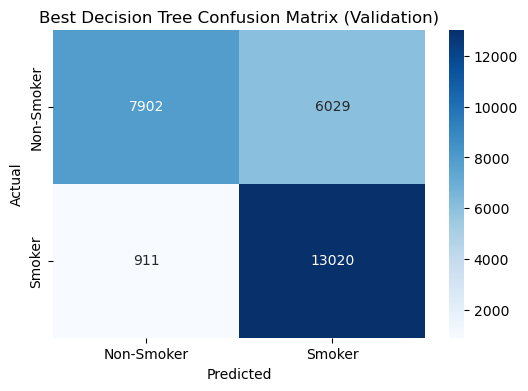

In [13]:
if 'X_train_processed' in locals():

    # --- Hyperparameter Tuning for Decision Tree (using GridSearchCV) ---
    print("\n--- Tuning Decision Tree ---")
    dt_param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 10, 20, 50],
        'min_samples_leaf': [1, 5, 10, 20]
    }
    dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

    # Uncomment the line below to run GridSearchCV
    dt_grid_search.fit(X_train_processed, y_train)
    print(f"Best DT Parameters: {dt_grid_search.best_params_}")
    best_dt_classifier = dt_grid_search.best_estimator_

    # best_dt_params = {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}
    # best_dt_classifier = DecisionTreeClassifier(**best_dt_params, random_state=42)

    # Train the best Decision Tree model
    print("\n--- Training Best Decision Tree ---")
    start_time_dt_train = time.time()
    best_dt_classifier.fit(X_train_processed, y_train)
    end_time_dt_train = time.time()
    training_time_dt = end_time_dt_train - start_time_dt_train
    training_times['Decision Tree'] = training_time_dt
    print(f"\nBest Decision Tree model trained! Training time: {training_time_dt:.2f} seconds")

    # Make predictions on the validation set
    start_time_dt_val = time.time()
    y_pred_dt = best_dt_classifier.predict(X_val_processed)
    end_time_dt_val = time.time()
    validation_time_dt = end_time_dt_val - start_time_dt_val
    validation_times['Decision Tree'] = validation_time_dt
    print(f"\nBest Decision Tree model validated! Validation time: {validation_time_dt:.2f} seconds")

    # Evaluate the model
    accuracy_dt = accuracy_score(y_val, y_pred_dt)
    precision_dt = precision_score(y_val, y_pred_dt)
    recall_dt = recall_score(y_val, y_pred_dt)
    f1_dt = f1_score(y_val, y_pred_dt)
    roc_auc_dt = roc_auc_score(y_val, best_dt_classifier.predict_proba(X_val_processed)[:, 1])
    cm_dt = confusion_matrix(y_val, y_pred_dt)
    model_performance['Decision Tree'] = {'Accuracy': accuracy_dt, 'Precision': precision_dt, 'Recall': recall_dt, 'F1-Score': f1_dt, 'ROC-AUC': roc_auc_dt}

    print("\n--- Best Decision Tree Validation Metrics ---\n")
    print(f"Accuracy: {accuracy_dt:.4f}")
    print(f"Precision: {precision_dt:.4f}")
    print(f"Recall: {recall_dt:.4f}")
    print(f"F1-Score: {f1_dt:.4f}")
    print(f"ROC-AUC: {roc_auc_dt:.4f}\n")

    # Display the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
    plt.title('Best Decision Tree Confusion Matrix (Validation)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
else:
    print("Processed training data not available for Decision Tree.")

### 6.2. k-Nearest Neighbors (k-NN) Classifier


--- Tuning k-Nearest Neighbors ---

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best k-NN Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}

--- Training Best k-Nearest Neighbors ---

Best k-NN model trained! Training time: 0.08 seconds
Best k-NN model validated! Validation time: 30.34 seconds

--- Best k-NN Validation Metrics ---

Accuracy: 0.7669
Precision: 0.7284
Recall: 0.8511
F1-Score: 0.7850
ROC-AUC: 0.8340



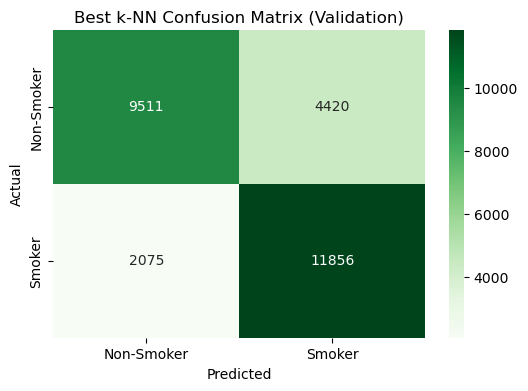

In [14]:
if 'X_train_processed' in locals():

    # --- Hyperparameter Tuning for k-NN (using GridSearchCV) ---
    print("\n--- Tuning k-Nearest Neighbors ---\n")
    knn_param_grid = {
        'n_neighbors': [3, 7, 11, 15], # 3, 5, 7, 9, 11, 15
        'weights': ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree', 'brute'], # ['auto', 'ball_tree', 'kd_tree', 'brute']
        'p': [1, 2] # 1 for Manhattan, 2 for Euclidean
    }
    knn_grid_search = GridSearchCV(KNeighborsClassifier(n_jobs=-1), knn_param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

    # Uncomment the line below to run GridSearchCV
    knn_grid_search.fit(X_train_processed, y_train)
    print(f"Best k-NN Parameters: {knn_grid_search.best_params_}")
    best_knn_classifier = knn_grid_search.best_estimator_

    # best_knn_params = {'n_neighbors': 15, 'p': 2, 'weights': 'uniform', 'algorithm': 'ball_tree'}
    # best_knn_classifier = KNeighborsClassifier(**best_knn_params, n_jobs=-1)

    # Train the best k-NN model
    print("\n--- Training Best k-Nearest Neighbors ---\n")
    start_time_knn_train = time.time()
    best_knn_classifier.fit(X_train_processed, y_train)
    end_time_knn_train = time.time()
    training_time_knn = end_time_knn_train - start_time_knn_train
    training_times['k-NN'] = training_time_knn
    print(f"Best k-NN model trained! Training time: {training_time_knn:.2f} seconds")

    # Make predictions on the validation set
    start_time_knn_val = time.time()
    y_pred_knn = best_knn_classifier.predict(X_val_processed) # Corrected variable
    end_time_knn_val = time.time()
    validation_time_knn = end_time_knn_val - start_time_knn_val
    validation_times['k-NN'] = validation_time_knn
    print(f"Best k-NN model validated! Validation time: {validation_time_knn:.2f} seconds")

    # Evaluate the model
    accuracy_knn = accuracy_score(y_val, y_pred_knn)
    precision_knn = precision_score(y_val, y_pred_knn)
    recall_knn = recall_score(y_val, y_pred_knn)
    f1_knn = f1_score(y_val, y_pred_knn)
    roc_auc_knn = roc_auc_score(y_val, best_knn_classifier.predict_proba(X_val_processed)[:, 1])
    cm_knn = confusion_matrix(y_val, y_pred_knn)
    model_performance['k-NN'] = {'Accuracy': accuracy_knn, 'Precision': precision_knn, 'Recall': recall_knn, 'F1-Score': f1_knn, 'ROC-AUC': roc_auc_knn}

    print("\n--- Best k-NN Validation Metrics ---\n")
    print(f"Accuracy: {accuracy_knn:.4f}")
    print(f"Precision: {precision_knn:.4f}")
    print(f"Recall: {recall_knn:.4f}")
    print(f"F1-Score: {f1_knn:.4f}")
    print(f"ROC-AUC: {roc_auc_knn:.4f}\n")

    # Display the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
                xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
    plt.title('Best k-NN Confusion Matrix (Validation)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
else:
    print("Processed training data not available for k-NN.")

### 6.3. Support Vector Machine (SVM) Classifier


--- Tuning Support Vector Machine ---

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best SVM Parameters: {'C': 1.786429543354675, 'gamma': 0.0238687625248947, 'kernel': 'rbf'}

--- Training Best Support Vector Machine ---

Best SVM model trained! Training time: 1759.80 seconds
Best SVM model validated! Validation time: 62.80 seconds

--- Best SVM Validation Metrics ---

Accuracy: 0.7866
Precision: 0.7319
Recall: 0.9047
F1-Score: 0.8092
ROC-AUC: 0.8530



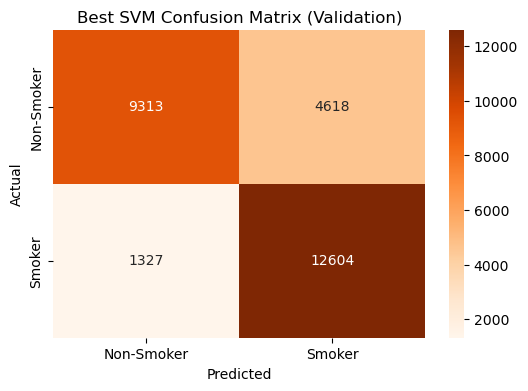

In [15]:
if 'X_train_processed' in locals():

    # --- Hyperparameter Tuning for SVM (using GridSearchCV) ---
    print("\n--- Tuning Support Vector Machine ---\n")
    svm_param_dist = {
        'C': expon(scale=1),
        'gamma': expon(scale=0.1),
        'kernel': ['rbf'],
    }
    n_search_iter = 10

    random_search_svm = RandomizedSearchCV(
        SVC(probability=True, random_state=42, cache_size=1200),
        param_distributions=svm_param_dist,
        n_iter=n_search_iter,
        cv=3,
        scoring='f1',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    # Uncomment the line below to run GridSearchCV
    random_search_svm.fit(X_train_processed, y_train)
    print(f"Best SVM Parameters: {random_search_svm.best_params_}")
    best_svm_classifier = random_search_svm.best_estimator_

    # best_svm_params = {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
    # best_svm_classifier = SVC(**best_svm_params, probability=True, random_state=42)

    # Train the best SVM model
    print("\n--- Training Best Support Vector Machine ---\n")
    start_time_svm_train = time.time()
    best_svm_classifier.fit(X_train_processed, y_train)
    end_time_svm_train = time.time()
    training_time_svm = end_time_svm_train - start_time_svm_train
    training_times['SVM'] = training_time_svm
    print(f"Best SVM model trained! Training time: {training_time_svm:.2f} seconds")

    # Make predictions on the validation set
    start_time_svm_val = time.time()
    y_pred_svm = best_svm_classifier.predict(X_val_processed)
    end_time_svm_val = time.time()
    validation_time_svm = end_time_svm_val - start_time_svm_val
    validation_times['SVM'] = validation_time_svm
    print(f"Best SVM model validated! Validation time: {validation_time_svm:.2f} seconds")

    # Evaluate the model
    accuracy_svm = accuracy_score(y_val, y_pred_svm)
    precision_svm = precision_score(y_val, y_pred_svm)
    recall_svm = recall_score(y_val, y_pred_svm)
    f1_svm = f1_score(y_val, y_pred_svm)
    roc_auc_svm = roc_auc_score(y_val, best_svm_classifier.predict_proba(X_val_processed)[:, 1])
    cm_svm = confusion_matrix(y_val, y_pred_svm)
    model_performance['SVM'] = {'Accuracy': accuracy_svm, 'Precision': precision_svm, 'Recall': recall_svm, 'F1-Score': f1_svm, 'ROC-AUC': roc_auc_svm}

    print("\n--- Best SVM Validation Metrics ---\n")
    print(f"Accuracy: {accuracy_svm:.4f}")
    print(f"Precision: {precision_svm:.4f}")
    print(f"Recall: {recall_svm:.4f}")
    print(f"F1-Score: {f1_svm:.4f}")
    print(f"ROC-AUC: {roc_auc_svm:.4f}\n")

    # Display the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges',
                xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
    plt.title('Best SVM Confusion Matrix (Validation)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
else:
    print("Processed training data not available for SVM.")

### 6.4. Neural Network (Multi-Layer Perceptron) Classifier


--- Defining and Training Neural Network (Original Version) ---

--- Neural Network (Original Version) Hyperparameters ---

layer_1_neurons: 64
layer_1_activation: relu
dropout_1_rate: 0.3
layer_2_neurons: 32
layer_2_activation: relu
dropout_2_rate: 0.2
output_layer_activation: sigmoid
optimizer: Adam
learning_rate: 0.001
loss_function: binary_crossentropy
epochs_trained_for: 15
batch_size: 32

-------------------------------------------------------


--- Model Summary (Original Version) ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)


-------------------------------------

--- Training Neural Network (Original Version) for 15 epochs ---
Epoch 1/15
3483/3483 ━━━━━━━━━━━━━━━━━━━━ 3s 739us/step - accuracy: 0.7493 - loss: 0.5037 - precision: 0.7144 - recall: 0.8296 - val_accuracy: 0.7813 - val_loss: 0.4599 - val_precision: 0.7366 - val_recall: 0.8757
Epoch 2/15
3483/3483 ━━━━━━━━━━━━━━━━━━━━ 2s 652us/step - accuracy: 0.7736 - loss: 0.4725 - precision: 0.7310 - recall: 0.8656 - val_accuracy: 0.7850 - val_loss: 0.4535 - val_precision: 0.7324 - val_recall: 0.8982
Epoch 3/15
3483/3483 ━━━━━━━━━━━━━━━━━━━━ 2s 692us/step - accuracy: 0.7753 - loss: 0.4680 - precision: 0.7311 - recall: 0.8715 - val_accuracy: 0.7863 - val_loss: 0.4533 - val_precision: 0.7357 - val_recall: 0.8935
Epoch 4/15
3483/3483 ━━━━━━━━━━━━━━━━━━━━ 2s 654us/step - accuracy: 0.7766 - loss: 0.4652 - precision: 0.7325 - recall: 0.8727 - val_accuracy: 0.7860 - val_loss: 0.4515 - val_precision: 0.7430 - val_recall: 0.8744
Epoch 5/15
3483/3483 ━━━━━━━━━━━━━━━━━━

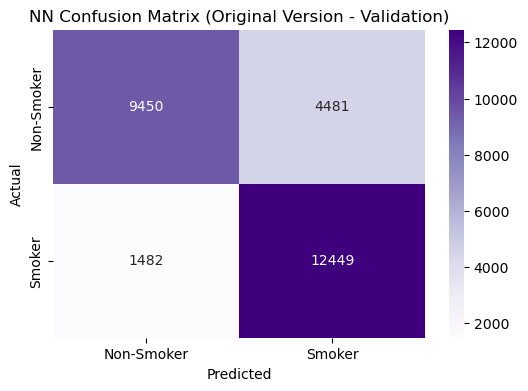


--- Training History (Original Version) ---



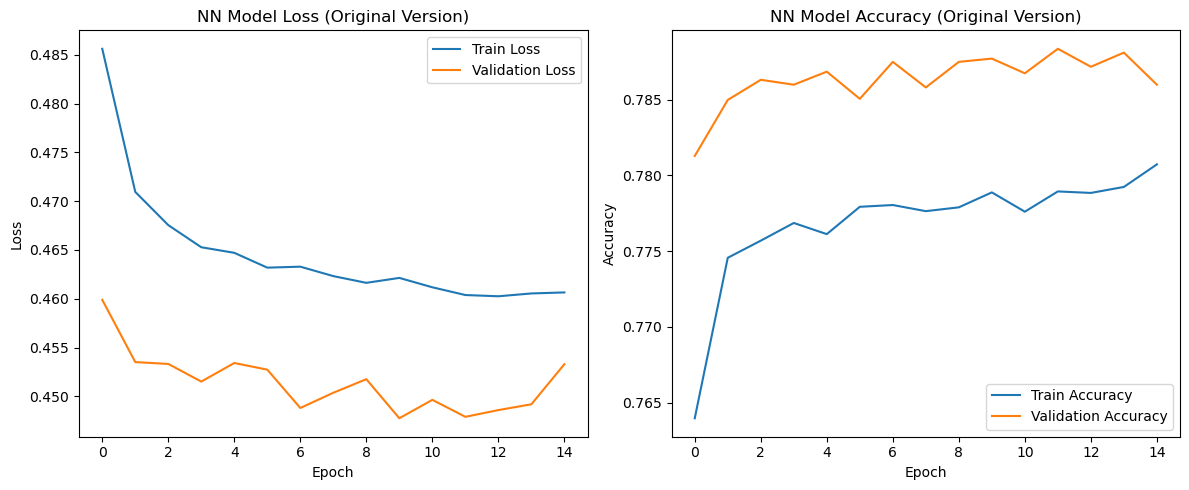

In [10]:
if 'X_train_processed' in locals():

    print("\n--- Defining and Training Neural Network (Original Version) ---\n")
    # --- Define Hyperparameters for this version ---
    nn_params_original = {
        'layer_1_neurons': 64,
        'layer_1_activation': 'relu',
        'dropout_1_rate': 0.3,
        'layer_2_neurons': 32,
        'layer_2_activation': 'relu',
        'dropout_2_rate': 0.2,
        'output_layer_activation': 'sigmoid',
        'optimizer': 'Adam',
        'learning_rate': 0.001,
        'loss_function': 'binary_crossentropy',
        'epochs_trained_for': 15,
        'batch_size': 32
    }

    print("--- Neural Network (Original Version) Hyperparameters ---\n")
    for param, value in nn_params_original.items():
        print(f"{param}: {value}")
    print("\n-------------------------------------------------------\n")

    # Define the Neural Network model
    nn_model_original = keras.Sequential([
        layers.Dense(nn_params_original['layer_1_neurons'], activation=nn_params_original['layer_1_activation'],
                     input_shape=(X_train_processed.shape[1],)),
        layers.Dropout(nn_params_original['dropout_1_rate']),
        layers.Dense(nn_params_original['layer_2_neurons'], activation=nn_params_original['layer_2_activation']),
        layers.Dropout(nn_params_original['dropout_2_rate']),
        layers.Dense(1, activation=nn_params_original['output_layer_activation'])
    ])

    # Compile the model
    nn_model_original.compile(optimizer=keras.optimizers.Adam(learning_rate=nn_params_original['learning_rate']),
                              loss=nn_params_original['loss_function'],
                              metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

    print("\n--- Model Summary (Original Version) ---")
    nn_model_original.summary()
    print("\n-------------------------------------\n")

    # Train the model
    epochs = nn_params_original['epochs_trained_for']
    batch_size = nn_params_original['batch_size']

    print(f"--- Training Neural Network (Original Version) for {epochs} epochs ---")
    start_time_nn_train = time.time()
    history_original = nn_model_original.fit(X_train_processed, y_train,
                                            epochs=epochs,
                                            batch_size=batch_size,
                                            validation_data=(X_val_processed, y_val),
                                            verbose=1) # Set to 1 or 2 for output, 0 for silent
    end_time_nn_train = time.time()
    training_time_nn_original = end_time_nn_train - start_time_nn_train

    # Use a distinct key for this version in your results dictionaries
    if 'training_times' not in globals(): training_times = {}
    training_times['Neural Network (Original)'] = training_time_nn_original
    print(f"\nNeural Network (Original Version) model trained! Training time: {training_time_nn_original:.2f} seconds")

    # Make predictions (probabilities)
    start_time_nn_val = time.time()
    y_pred_proba_nn_original = nn_model_original.predict(X_val_processed)
    y_pred_nn_original = (y_pred_proba_nn_original > 0.5).astype(int).flatten()
    end_time_nn_val = time.time()
    validation_time_nn_original = end_time_nn_val - start_time_nn_val
    if 'validation_times' not in globals(): validation_times = {}
    validation_times['Neural Network (Original)'] = validation_time_nn_original
    print(f"\nNeural Network (Original Version) model validated! Validation time: {validation_time_nn_original:.2f} seconds")

    # Evaluate the model
    accuracy_nn_original = accuracy_score(y_val, y_pred_nn_original)
    precision_nn_original = precision_score(y_val, y_pred_nn_original)
    recall_nn_original = recall_score(y_val, y_pred_nn_original)
    f1_nn_original = f1_score(y_val, y_pred_nn_original)
    roc_auc_nn_original = roc_auc_score(y_val, y_pred_proba_nn_original)
    cm_nn_original = confusion_matrix(y_val, y_pred_nn_original)

    if 'model_performance' not in globals(): model_performance = {}
    model_performance['Neural Network (Original)'] = {
        'Accuracy': accuracy_nn_original, 'Precision': precision_nn_original,
        'Recall': recall_nn_original, 'F1-Score': f1_nn_original, 'ROC-AUC': roc_auc_nn_original
    }

    print("\n--- Neural Network (Original Version) Validation Metrics ---\n")
    print(f"Accuracy: {accuracy_nn_original:.4f}")
    print(f"Precision: {precision_nn_original:.4f}")
    print(f"Recall: {recall_nn_original:.4f}")
    print(f"F1-Score: {f1_nn_original:.4f}")
    print(f"ROC-AUC: {roc_auc_nn_original:.4f}\n")

    # Display the confusion matrix
    print("\n--- Confusion Matrix (Original Version) ---\n")
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_nn_original, annot=True, fmt='d', cmap='Purples',
                xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
    plt.title('NN Confusion Matrix (Original Version - Validation)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("\n--- Training History (Original Version) ---\n")
    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history_original.history['loss'], label='Train Loss')
    plt.plot(history_original.history['val_loss'], label='Validation Loss')
    plt.title('NN Model Loss (Original Version)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.plot(history_original.history['accuracy'], label='Train Accuracy')
    plt.plot(history_original.history['val_accuracy'], label='Validation Accuracy')
    plt.title('NN Model Accuracy (Original Version)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

else:
    print("Processed training data not available for Neural Network.")


--- Defining and Training Enhanced Neural Network ---



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,209 (55.50 KB)

 Trainable params: 13,761 (53.75 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7105 - loss: 0.7309 - precision: 0.6870 - recall: 0.7749 - val_accuracy: 0.7819 - val_loss: 0.5702 - val_precision: 0.7353 - val_recall: 0.8809 - learning_rate: 5.0000e-04
Epoch 2/100
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7644 - loss: 0.5789 - precision: 0.7257 - recall: 0.8510 - val_accuracy: 0.7842 - val_loss: 0.5128 - val_precision: 0.7296 - val_recall: 0.9032 - learning_rate: 5.0000e-04
Epoch 3/100
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 2s 990us/step - accuracy: 0.7695 - loss: 0.5248 - precision: 0.7258 - recall: 0.8636 - val_accuracy: 0.7850 - val_loss: 0.4818 - val_precision: 0.7388 - val_recall: 0.8818 - learning_rate: 5.0000e-04
Epoch 4/100
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7703 - loss: 0.4998 - precision: 0.7307 - recall: 0.8566 - val_accuracy: 0.7864 - val_loss: 0.4681 - val_precision: 0.7385 - val_recall: 0.8869 - learning_rate: 5.0000e-04
Epoch 5/100
1742/1742 ━━━━━━━━━━━━

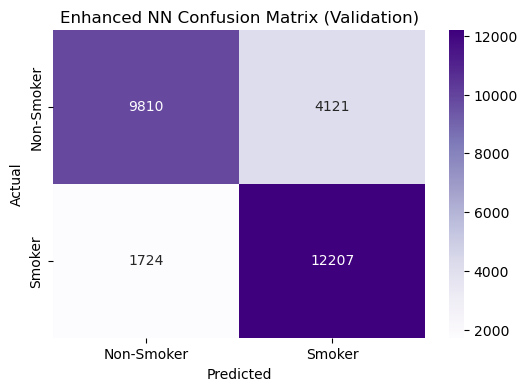


--- Training History (Enhanced Version) ---



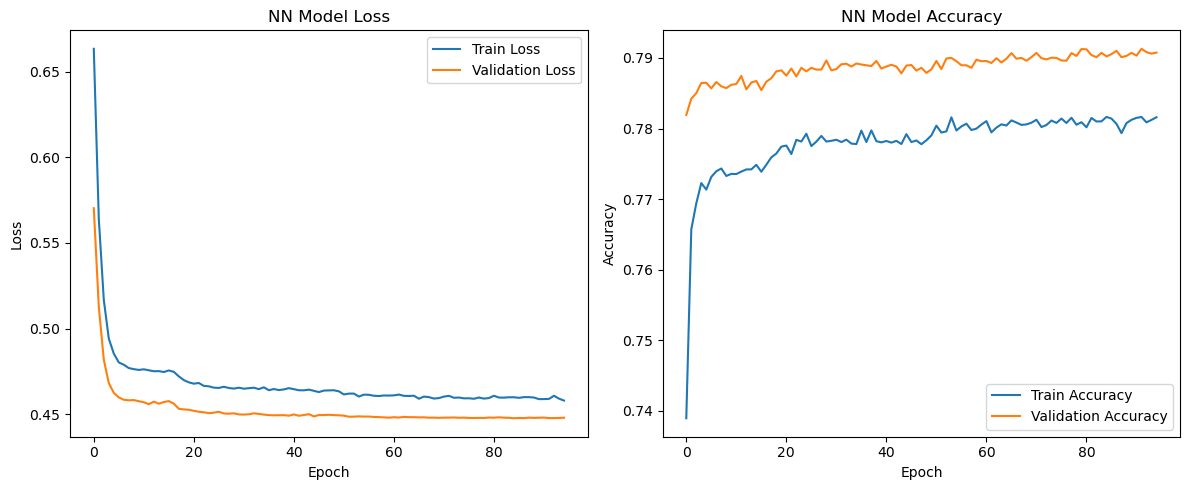

In [12]:
if 'X_train_processed' in locals():
    print("\n--- Defining and Training Enhanced Neural Network ---\n")
    # Define a potentially stronger Neural Network model
    nn_model = keras.Sequential([
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train_processed.shape[1],)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])

    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.00001,
        verbose=1
    )

    # Compile the model
    optimizer = keras.optimizers.Adam(learning_rate=0.0005)
    nn_model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

    nn_model.summary()

    # Train the model
    epochs = 100
    batch_size = 64

    start_time_nn_train = time.time()
    history = nn_model.fit(X_train_processed, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val_processed, y_val),
                        callbacks=[early_stopping, reduce_lr],
                        verbose=1)
    end_time_nn_train = time.time()
    training_time_nn = end_time_nn_train - start_time_nn_train
    if 'training_times' not in globals(): training_times = {}
    training_times['Neural Network_Enhanced'] = training_time_nn
    print(f"\nEnhanced Neural Network model trained! Training time: {training_time_nn:.2f} seconds")

    # Make predictions
    start_time_nn_val = time.time()
    y_pred_proba_nn = nn_model.predict(X_val_processed)
    y_pred_nn = (y_pred_proba_nn > 0.5).astype(int).flatten()
    end_time_nn_val = time.time()
    validation_time_nn = end_time_nn_val - start_time_nn_val
    if 'validation_times' not in globals(): validation_times = {}
    validation_times['Neural Network_Enhanced'] = validation_time_nn
    print(f"\nEnhanced Neural Network model validated! Validation time: {validation_time_nn:.2f} seconds")

    # Evaluate the model
    accuracy_nn = accuracy_score(y_val, y_pred_nn)
    precision_nn = precision_score(y_val, y_pred_nn)
    recall_nn = recall_score(y_val, y_pred_nn)
    f1_nn = f1_score(y_val, y_pred_nn)
    roc_auc_nn = roc_auc_score(y_val, y_pred_proba_nn)
    cm_nn = confusion_matrix(y_val, y_pred_nn)
    if 'model_performance' not in globals(): model_performance = {}
    model_performance['Neural Network_Enhanced'] = {
        'Accuracy': accuracy_nn, 'Precision': precision_nn,
        'Recall': recall_nn, 'F1-Score': f1_nn, 'ROC-AUC': roc_auc_nn
    }

    print("\n--- Enhanced Neural Network Validation Metrics ---\n")
    print(f"Accuracy: {accuracy_nn:.4f}")
    print(f"Precision: {precision_nn:.4f}")
    print(f"Recall: {recall_nn:.4f}")
    print(f"F1-Score: {f1_nn:.4f}")
    print(f"ROC-AUC: {roc_auc_nn:.4f}\n")

    # Display the confusion matrix
    print("\n--- Confusion Matrix (Enhanced Version) ---\n")
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples',
                xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
    plt.title('Enhanced NN Confusion Matrix (Validation)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot training history
    print("\n--- Training History (Enhanced Version) ---\n")
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('NN Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('NN Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

else:
    print("Processed training data not available for Neural Network.")

## 7. Model Performance Assessment and Comparison


--- Model Performance Comparison ---

                           Accuracy  Precision    Recall  F1-Score   ROC-AUC  \
SVM                        0.786627   0.731855  0.904745  0.809168  0.852993   
Neural Network_Enhanced    0.790216   0.747611  0.876247  0.806834  0.863089   
Neural Network (Original)  0.785981   0.735322  0.893619  0.806779  0.861444   
Decision Tree              0.750915   0.683500  0.934606  0.789569  0.809570   
k-NN                       0.766887   0.728435  0.851052  0.784984  0.834025   

                           Training Time (s)  Validation Time (s)  
SVM                              1759.804418            62.800443  
Neural Network_Enhanced           176.254574             0.436108  
Neural Network (Original)          36.256242             0.350882  
Decision Tree                       0.155410             0.002756  
k-NN                                0.083986            30.343477  


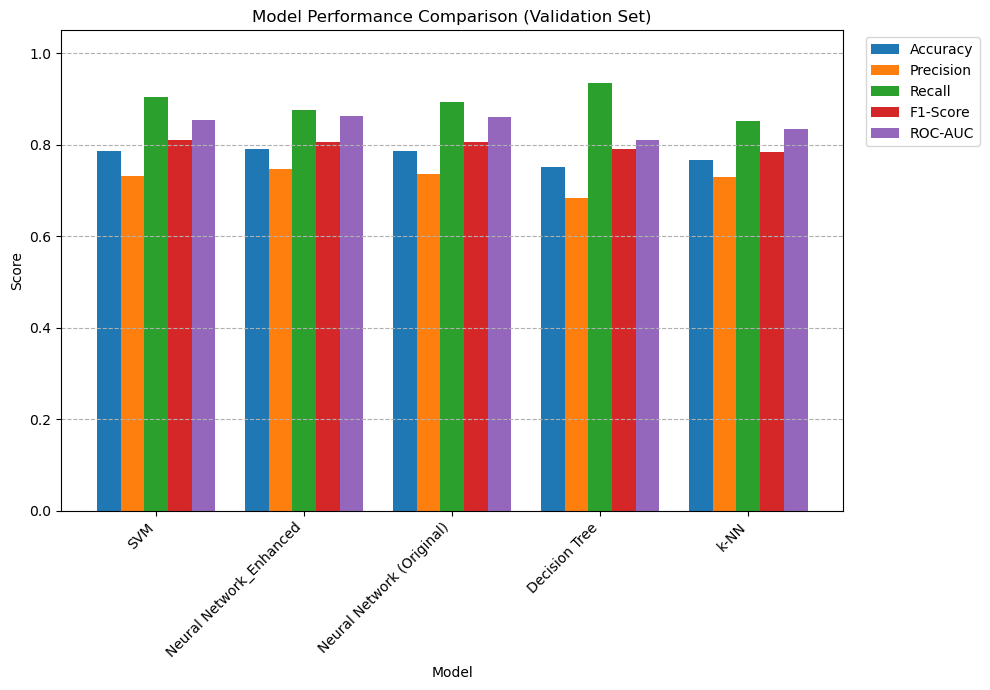

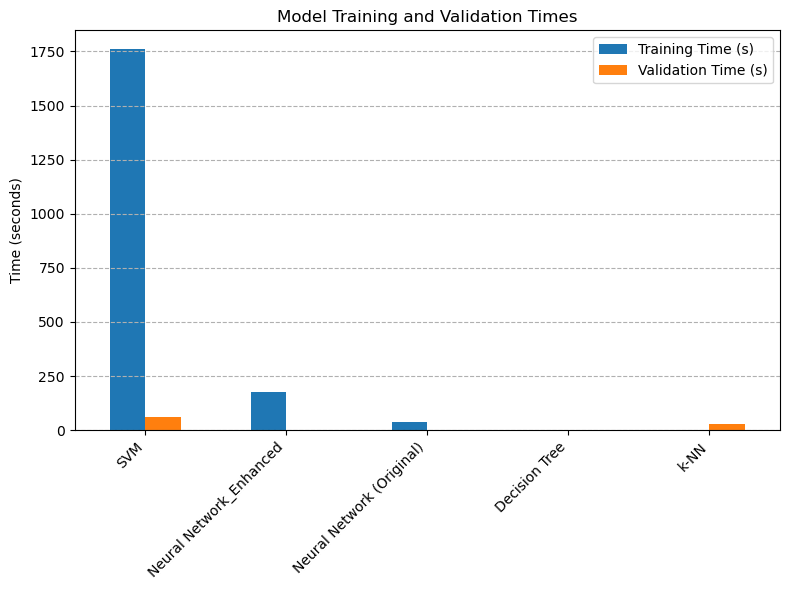

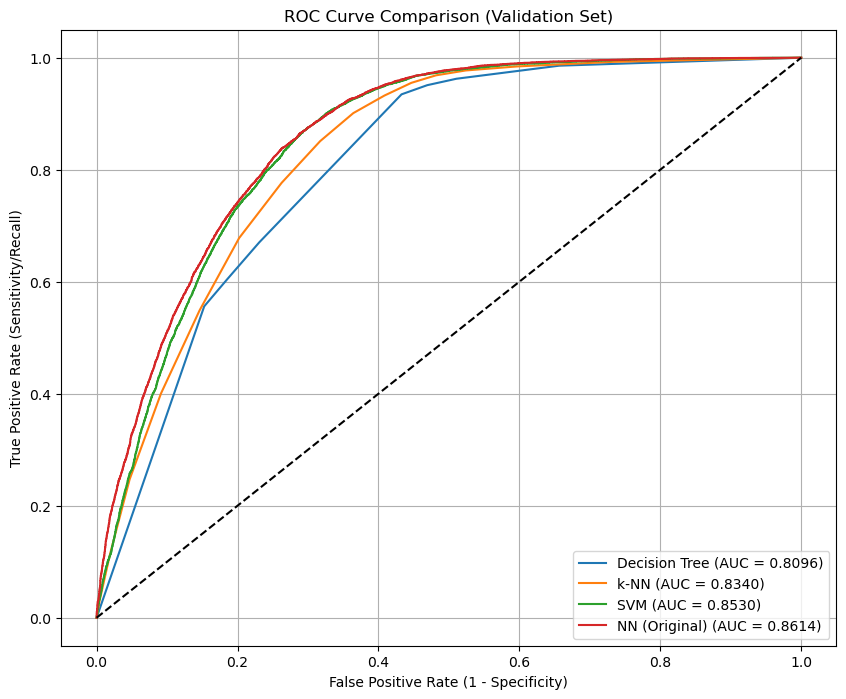

In [18]:
performance_df = pd.DataFrame(model_performance).T
performance_df['Training Time (s)'] = pd.Series(training_times)
performance_df['Validation Time (s)'] = pd.Series(validation_times)

# Sort by F1-Score (or another metric like ROC-AUC)
performance_df = performance_df.sort_values(by='F1-Score', ascending=False)

print("\n--- Model Performance Comparison ---\n")
print(performance_df)

# --- Plotting the performance metrics for comparison ---
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
n_metrics = len(metrics_to_plot)
model_names = performance_df.index
n_models = len(model_names)

fig, ax = plt.subplots(figsize=(max(10, n_models * n_metrics * 0.3), 7))

bar_width = 0.8 / n_metrics
index = np.arange(n_models)

for i, metric in enumerate(metrics_to_plot):
    offset = bar_width * i
    plt.bar(index + offset, performance_df[metric], bar_width, label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison (Validation Set)')
plt.xticks(index + bar_width * (n_metrics - 1) / 2, model_names, rotation=45, ha="right")
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()
print("\n")

# --- Plotting Training and Validation Times ---
times_df = performance_df[['Training Time (s)', 'Validation Time (s)']].copy()
times_df.plot(kind='bar', figsize=(max(8, n_models * 1.5), 6))
plt.title('Model Training and Validation Times')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()
print("\n")


# --- ROC Curve Comparison ---
plt.figure(figsize=(10, 8))

# Decision Tree
if 'best_dt_classifier' in locals() and hasattr(best_dt_classifier, 'predict_proba'):
    if 'Decision Tree' in model_performance and 'ROC-AUC' in model_performance['Decision Tree']:
        fpr_dt, tpr_dt, _ = roc_curve(y_val, best_dt_classifier.predict_proba(X_val_processed)[:,1])
        auc_dt = model_performance['Decision Tree']['ROC-AUC']
        plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.4f})")

# k-NN
if 'best_knn_classifier' in locals() and hasattr(best_knn_classifier, 'predict_proba'):
    if 'k-NN' in model_performance and 'ROC-AUC' in model_performance['k-NN']:
        fpr_knn, tpr_knn, _ = roc_curve(y_val, best_knn_classifier.predict_proba(X_val_processed)[:,1])
        auc_knn = model_performance['k-NN']['ROC-AUC']
        plt.plot(fpr_knn, tpr_knn, label=f"k-NN (AUC = {auc_knn:.4f})")

# SVM
if 'final_best_svm_classifier' in locals() and hasattr(final_best_svm_classifier, 'predict_proba'):
    if 'SVM' in model_performance and 'ROC-AUC' in model_performance['SVM']: # Adjust key if you used 'SVM_Randomized'
        fpr_svm, tpr_svm, _ = roc_curve(y_val, final_best_svm_classifier.predict_proba(X_val_processed)[:,1])
        auc_svm = model_performance['SVM']['ROC-AUC'] # Adjust key if needed
        plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.4f})")
elif 'best_svm_classifier' in locals() and hasattr(best_svm_classifier, 'predict_proba'): # Fallback if old name was used
    if 'SVM' in model_performance and 'ROC-AUC' in model_performance['SVM']:
        fpr_svm, tpr_svm, _ = roc_curve(y_val, best_svm_classifier.predict_proba(X_val_processed)[:,1])
        auc_svm = model_performance['SVM']['ROC-AUC']
        plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.4f})")


# Neural Network (Original Version)
if 'nn_model_original' in locals() and 'y_pred_proba_nn_original' in globals():
    if 'Neural Network (Original)' in model_performance and 'ROC-AUC' in model_performance['Neural Network (Original)']:
        fpr_nn_orig, tpr_nn_orig, _ = roc_curve(y_val, y_pred_proba_nn_original)
        auc_nn_orig = model_performance['Neural Network (Original)']['ROC-AUC']
        plt.plot(fpr_nn_orig, tpr_nn_orig, label=f"NN (Original) (AUC = {auc_nn_orig:.4f})")

# Neural Network (Enhanced Version)
if 'nn_model_enhanced' in locals() and 'y_pred_proba_nn_enhanced' in globals():
    if 'Neural Network (Enhanced)' in model_performance and 'ROC-AUC' in model_performance['Neural Network (Enhanced)']:
        fpr_nn_enh, tpr_nn_enh, _ = roc_curve(y_val, y_pred_proba_nn_enhanced)
        auc_nn_enh = model_performance['Neural Network (Enhanced)']['ROC-AUC']
        plt.plot(fpr_nn_enh, tpr_nn_enh, label=f"NN (Enhanced) (AUC = {auc_nn_enh:.4f})")


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('ROC Curve Comparison (Validation Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()